# ATM 623: Climate Modeling
## The two-layer grey radiation model (aka the leaky greenhouse)

<div class="alert">
As of IPython 2.0, the user interface has changed significantly
</div>

<div class="alert alert-success">
Enter edit mode by pressing `Enter`
</div>

<div class="alert alert-error">
Don't try to type into a cell in command mode
</div>

- Surface temperature is $T_s$
- Atm. temperatures are $T_1, T_2$ where $T_1$ is closest to the surface.
- absorptivity of atm layers is $\epsilon_1, \epsilon_2$
- Surface emission is $\sigma T_s^4$
- Atm emission is $\epsilon_1 \sigma T_1^4, \epsilon_2 \sigma T_2^4$ (up and down)
- Abs = emissivity for atm layers
- Transmissivity for atm layers is $\tau_1, \tau_2$ where $\tau_i = (1-\epsilon_i)$

### Emission
$$ E_s = \sigma T_s^4 $$

$$ E_1 = \epsilon_1 \sigma T_1^4 $$

$$ E_2 = \epsilon_2 \sigma T_2^4 $$

### Incident radiation

$$ F_s = \tau_1 E_2 + E_1 $$

$$ F_1 = E_s + E_2 $$

$$ F_2 = \tau_1 E_s + E_1 $$

### Net radiation
(absorptivity) * incident - emission

$$ R_s = F_s - E_s $$

$$ R_1 = \epsilon_1 F_1 - 2 E_1 $$

$$ R_2 = \epsilon_2 F_2 - 2 E_2 $$

### OLR

$$ OLR = \tau_2 F_2 + E_2 $$

$$ = \tau_1 \tau_2 E_s + \tau_2 E_1 + E_2 $$
$$ = \tau_1 \tau_2 \sigma T_s^4 + \tau_2 \epsilon_1 \sigma T_1^4 + \epsilon_2 \sigma T_2^4 $$

### Net radiation in terms of emissions

$$ R_s = \tau_1 E_2 + E_1 - E_s $$

$$ R_1 = \epsilon_1 (E_s + E_2) - 2 E_1 $$

$$ R_2 = \epsilon_2 (\tau_1 E_s + E_1) - 2 E_2 $$

### Net radiation in terms of temperatures

$$ R_s = \tau_1 \epsilon_2 \sigma T_2^4 + \epsilon_1 \sigma T_1^4 - \sigma T_s^4 $$

$$ R_1 = \epsilon_1 (\sigma T_s^4 + \epsilon_2 \sigma T_2^4) - 2 \epsilon_1 \sigma T_1^4 $$

$$ R_2 = \epsilon_2 (\tau_1 \sigma T_s^4 + \epsilon_1 \sigma T_1^4) - 2 \epsilon_2 \sigma T_2^4 $$

### Net radiation in terms of temperatures and absorptivities

$$ R_s = (1-\epsilon_1) \epsilon_2 \sigma T_2^4 + \epsilon_1 \sigma T_1^4 - \sigma T_s^4 $$

$$ R_1 = \epsilon_1 (\sigma T_s^4 + \epsilon_2 \sigma T_2^4) - 2 \epsilon_1 \sigma T_1^4 $$

$$ R_2 = \epsilon_2 ((1-\epsilon_1) \sigma T_s^4 + \epsilon_1 \sigma T_1^4) - 2 \epsilon_2 \sigma T_2^4 $$

## Solve for radiative equilibrium
Need to add the solar energy source. We assume atm is transparent, solar is all absorbed at the surface.

$$ R_1 = R_2 = 0$$

$$ R_s = - (1-\alpha) Q $$

Introduce useful notation shorthand:

$$ (1-\alpha) Q = \sigma T_e^4 $$

This gives a 3x3 system which is **linear in $T^4$** (divide through by $\sigma$)

$$ - T_s^4 + \epsilon_1 T_1^4 + (1-\epsilon_1) \epsilon_2  T_2^4 + T_e^4 = 0 $$

$$ \epsilon_1 T_s^4 - 2 \epsilon_1 T_1^4 + \epsilon_1 \epsilon_2  T_2^4 = 0$$

$$ \epsilon_2 (1-\epsilon_1) T_s^4 + \epsilon_1 \epsilon_2 T_1^4 - 2 \epsilon_2 T_2^4 = 0$$

Here we use the `sympy` module to solve the algebraic system symbolically.

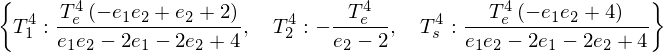

In [1]:
import sympy
sympy.init_printing()
T_s, T_1, T_2, T_e, e_1, e_2 = sympy.symbols('T_s, T_1, T_2, T_e, e_1, e_2', positive=True )
system = [-T_s**4 + e_1*T_1**4 + e_2*(1-e_1)*T_2**4 + T_e**4,
              e_1*T_s**4 - 2*e_1*T_1**4 + e_1*e_2*T_2**4,
              e_2*(1-e_1)*T_s**4 + e_1*e_2*T_1**4 - 2*e_2*T_2**4]
out1 = sympy.solve( system, [T_s**4, T_1**4, T_2**4])
out1

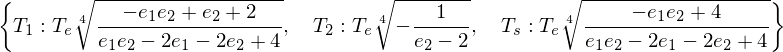

In [2]:
quarter = sympy.Rational(1,4)
out2 = {}
for var4, formula in out1.iteritems():
    var = (var4)**quarter
    out2[var] = sympy.simplify(formula**quarter)
out2

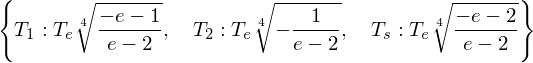

In [3]:
#  The special case of equal absorptivities
e = sympy.symbols('e')
out3 = {}
for var4, formula in out1.iteritems():
    var = (var4)**quarter
    simple_formula = sympy.cancel(formula.subs([(e_2, e),(e_1, e)]))
    out3[var] = sympy.simplify( simple_formula**quarter )
out3

The solution is

\begin{align} 
T_s^4 &= T_e^4 \frac{4 - \epsilon_1 \epsilon_2}{4 + \epsilon_1 \epsilon_2 - 2 \epsilon_1 - 2 \epsilon_2}  \\
T_1^4 &= T_e^4 \frac{2 -\epsilon_1 \epsilon_2 + \epsilon_2}{4 + \epsilon_1 \epsilon_2 - 2 \epsilon_1 - 2 \epsilon_2} \\
T_2^4 &= T_e^4 \frac{ 1}{2 - \epsilon_2}
\end{align}

In the special case $\epsilon_1 = \epsilon_2$ this reduces to

\begin{align} 
T_s^4 &= T_e^4 \frac{2+\epsilon}{2-\epsilon}  \\
T_1^4 &= T_e^4 \frac{1+\epsilon}{2-\epsilon} \\
T_2^4 &= T_e^4 \frac{ 1}{2 - \epsilon}
\end{align}

In [4]:
out2[T_s].subs([(T_e, 255), (e_1, 0.4), (e_2, 0.4)])

In [5]:
for var, formula in out2.iteritems():
    print formula.subs([(T_e, 255), (e_1, 0.4), (e_2, 0.4)])

246.627893584128
282.203889523582
226.730624779963


In [6]:
# Coding up the analytical solutions for radiative equilibrium
#  These use the analytical results returned by sympy and wrap them in callable functions

def Ts(Te, e1, e2):
    #return Te*((4-e1*e2)/(4+e1*e2-2*(e1+e2)))**0.25
    return out2[T_s].subs([(T_e, Te), (e_1, e1), (e_2, e2)])
def T1(Te, e1, e2):
    #return Te*((2+e2-e1*e2)/(4+e1*e2-2*(e1+e2)))**0.25
    return out2[T_1].subs([(T_e, Te), (e_1, e1), (e_2, e2)])
def T2(Te, e1, e2):
    #return Te*(1/(2-e2))**0.25
    return out2[T_2].subs([(T_e, Te), (e_1, e1), (e_2, e2)])

In [7]:
%matplotlib inline
import numpy as np
from climlab import constants as const
from climlab.model import column

In [8]:
mycolumn = column.GreyRadiationModel( num_lev=2 )

In [9]:
print mycolumn

climlab Process of type <class 'climlab.model.column.GreyRadiationModel'>. 
State variables and domain shapes: 
  Tatm: (2,) 
  Ts: (1,) 
The subprocess tree: 
top: <class 'climlab.model.column.GreyRadiationModel'>
   LW: <class 'climlab.radiation.radiation.Radiation'>
   SW: <class 'climlab.radiation.radiation.RadiationSW'>
   surface: <class 'climlab.surface.surface_radiation.SurfaceRadiation'>
   insolation: <class 'climlab.radiation.insolation.FixedInsolation'>



In [10]:
mycolumn.integrate_years(10.)

Integrating for 3652 steps, 3652.422 days, or 10.0 years.
Total elapsed time is 9.99884460229 years.


In [11]:
print mycolumn.Ts
print mycolumn.Tatm

[ 287.84605967]
[ 252.95019305  229.43643402]


In [12]:
(e1, e2)= mycolumn.subprocess['LW'].absorptivity
print e1, e2

0.477374247427 0.477374247427


In [13]:
ASR = (1-mycolumn.param['albedo_sfc'])*mycolumn.param['Q']
Te = (ASR/const.sigma)**0.25
print Te

254.865280431


## Check numerical versus analytical results

Use a tolerance value to test if the results are the same.

In [14]:
tol = 0.01

def test_2level(col):
    (e1, e2)= col.subprocess['LW'].absorptivity
    ASR = (1-col.param['albedo_sfc'])*col.param['Q']
    Te = (ASR/const.sigma)**0.25
    print 'Surface:'
    num = col.Ts
    anal = Ts(Te,e1,e2)
    print '  Numerical: %.2f   Analytical: %.2f    Same:' %(num, anal) , abs(num - anal)<tol
    print 'Level 1'
    num = col.Tatm[0]
    anal = T1(Te,e1,e2)
    print '  Numerical: %.2f   Analytical: %.2f    Same:' %(num, anal) , abs(num - anal)<tol
    print 'Level 2'
    num = col.Tatm[1]
    anal = T2(Te,e1,e2)
    print '  Numerical: %.2f   Analytical: %.2f    Same:' %(num, anal) , abs(num - anal)<tol

In [15]:
test_2level(mycolumn)

Surface:
  Numerical: 287.85   Analytical: 287.85    Same: [ True]
Level 1
  Numerical: 252.95   Analytical: 252.95    Same: True
Level 2
  Numerical: 229.44   Analytical: 229.44    Same: True


In [16]:
e1 = 0.3
e2 = 0.4
mycolumn.subprocess['LW'].absorptivity = np.array([e1,e2])
mycolumn.integrate_years(10.)

Integrating for 3652 steps, 3652.422 days, or 10.0 years.
Total elapsed time is 19.9976892046 years.


In [17]:
test_2level(mycolumn)

Surface:
  Numerical: 278.53   Analytical: 278.53    Same: [ True]
Level 1
  Numerical: 243.87   Analytical: 243.87    Same: True
Level 2
  Numerical: 226.61   Analytical: 226.61    Same: True


In [18]:
e1 = 0.6
e2 = 0.6
mycolumn.subprocess['LW'].absorptivity = np.array([e1,e2])
mycolumn.integrate_years(10.)
test_2level(mycolumn)

Integrating for 3652 steps, 3652.422 days, or 10.0 years.
Total elapsed time is 29.9965338069 years.
Surface:
  Numerical: 297.52   Analytical: 297.52    Same: [ True]
Level 1
  Numerical: 263.52   Analytical: 263.52    Same: True
Level 2
  Numerical: 234.30   Analytical: 234.30    Same: True


In [19]:
col1 = column.GreyRadiationModel(num_lev=2, abs_coeff=1.9E-4)
(e1, e2) = col1.subprocess['LW'].absorptivity
print e1, e2
col1.integrate_years(10.)
test_2level(col1)

0.652920962199 0.652920962199
Integrating for 3652 steps, 3652.422 days, or 10.0 years.
Total elapsed time is 9.99884460229 years.
Surface:
  Numerical: 301.92   Analytical: 301.92    Same: [ True]
Level 1
  Numerical: 268.24   Analytical: 268.24    Same: True
Level 2
  Numerical: 236.57   Analytical: 236.57    Same: True


In [20]:
col1 = column.GreyRadiationModel(num_lev=2, abs_coeff=1.9E-4)
lw = col1.subprocess['LW']
(e1, e2) = lw.absorptivity
e1 *= 1.2
lw.absorptivity = np.array([e1, e2])
col1.integrate_years(10.)
test_2level(col1)

Integrating for 3652 steps, 3652.422 days, or 10.0 years.
Total elapsed time is 9.99884460229 years.
Surface:
  Numerical: 307.85   Analytical: 307.85    Same: [ True]
Level 1
  Numerical: 272.49   Analytical: 272.49    Same: True
Level 2
  Numerical: 236.57   Analytical: 236.57    Same: True


### Conclusion: The Two-level model works

## Three-layer model

Extend the analysis to three layers.
Start numbering the layers from 0 to be consistent with array indexing.


In [21]:
T_s, T_0, T_1, T_2, T_e, epsilon_0, epsilon_1, epsilon_2, sigma = \
    sympy.symbols('T_s, T_0, T_1, T_2, T_e, epsilon_0, epsilon_1, epsilon_2, sigma', positive=True )

Define the transmissivities $\tau_i$ for layers $i=0, 1, \dots, N-1$

In [22]:
tau_0 = (1-epsilon_0)
tau_1 = (1-epsilon_1)
tau_2 = (1-epsilon_2)
tau_0, tau_1, tau_2

Note that if the atmosphere has $N$ layers then $\epsilon_N = 0$

Define the emissions for each layer:

In [23]:
E_s = sigma*T_s**4
E_0 = epsilon_0*sigma*T_0**4
E_1 = epsilon_1*sigma*T_1**4
E_2 = epsilon_2*sigma*T_2**4
E_s, E_0, E_1, E_2

Define the longwave fluxes incident on each layer, $F_{i}$

Note that if the atmosphere has $N$ layers then $F_{N}$ is the OLR (emission to space)

In [24]:
F_s = E_0 + tau_0*E_1 + tau_0*tau_1*E_2
F_0 = E_s + E_1 + tau_1*E_2
F_1 = tau_0*E_s + E_0 + E_2
F_2 = tau_1*tau_0*E_s + tau_1*E_0 + E_1
F_3 = tau_2*tau_1*tau_0*E_s + tau_2*tau_1*E_0 + tau_2*E_1 + E_2

F_s, F_0, F_1, F_2, F_3

Now define the net absorbed longwave radiation (flux divergence) in each layer.

In [25]:
R_s = F_s - E_s
R_0 = epsilon_0*F_0 - 2*E_0
R_1 = epsilon_1*F_1 - 2*E_1
R_2 = epsilon_2*F_2 - 2*E_2

R_s, R_0, R_1, R_2

### Solve for radiative equilibrium

Use `sympy.solve` to automatically solve the algebraic system.

We will solve for the **radiative equilibrium temperatures** in two steps:

- First solve for $T_i^4$, which is a purely linear problem.
- Then take the fourth roots to solve for the temperatures.

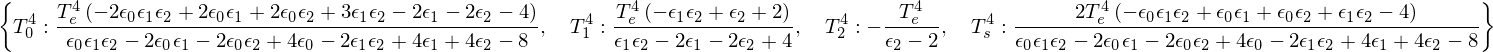

In [26]:
out1 = sympy.solve([R_s + sigma*T_e**4, R_0, R_1, R_2],
            [T_s**4, T_0**4, T_1**4, T_2**4])
out1

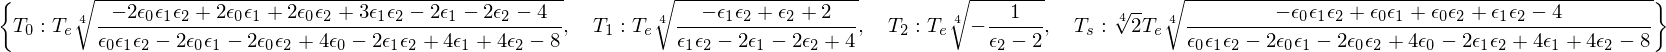

In [27]:
quarter = sympy.Rational(1,4)
out2 = {}
for var4, formula in out1.iteritems():
    var = (var4)**quarter
    out2[var] = sympy.simplify(formula**quarter)
out2

Now wrap these analytical radiative equilibrium solutions in callable functions:

In [28]:
def Ts(Te, e0, e1, e2):
    return out2[T_s].subs([(T_e, Te), (epsilon_0, e0), (epsilon_1, e1), (epsilon_2, e2)])
def T0(Te, e0, e1, e2):
    return out2[T_0].subs([(T_e, Te), (epsilon_0, e0), (epsilon_1, e1), (epsilon_2, e2)])
def T1(Te, e0, e1, e2):
    return out2[T_1].subs([(T_e, Te), (epsilon_0, e0), (epsilon_1, e1), (epsilon_2, e2)])
def T2(Te, e0, e1, e2):
    return out2[T_2].subs([(T_e, Te), (epsilon_0, e0), (epsilon_1, e1), (epsilon_2, e2)])

### Compare numerical and analytical solutions for radiative equilibrium

Define a function that takes a `climlab.column.GreyRadiationModel` object (which should be first integrated out to equilibrium), and compares the numerical solution to our analytical solution.

In [29]:
tol = 0.01

def test_3level(col):
    (e0, e1, e2)= col.subprocess['LW'].absorptivity
    ASR = (1-col.param['albedo_sfc'])*col.param['Q']
    Te = (ASR/const.sigma)**0.25
    print 'Surface:'
    num = col.Ts
    anal = Ts(Te,e0,e1,e2)
    print '  Numerical: %.2f   Analytical: %.2f    Same:' %(num, anal) , abs(num - anal)<tol
    print 'Level 0'
    num = col.Tatm[0]
    anal = T0(Te,e0,e1,e2)
    print '  Numerical: %.2f   Analytical: %.2f    Same:' %(num, anal) , abs(num - anal)<tol
    print 'Level 1'
    num = col.Tatm[1]
    anal = T1(Te,e0,e1,e2)
    print '  Numerical: %.2f   Analytical: %.2f    Same:' %(num, anal) , abs(num - anal)<tol
    print 'Level 2'
    num = col.Tatm[2]
    anal = T2(Te,e0,e1,e2)
    print '  Numerical: %.2f   Analytical: %.2f    Same:' %(num, anal) , abs(num - anal)<tol

In [30]:
col = column.GreyRadiationModel( num_lev=3 )
col.integrate_years(10.)
test_3level(col)

Integrating for 3652 steps, 3652.422 days, or 10.0 years.
Total elapsed time is 9.99884460229 years.
Surface:
  Numerical: 287.85   Analytical: 287.85    Same: [ True]
Level 0
  Numerical: 256.29   Analytical: 256.29    Same: True
Level 1
  Numerical: 242.05   Analytical: 242.05    Same: True
Level 2
  Numerical: 224.73   Analytical: 224.73    Same: True


In [31]:
e0 = 0.3
e1 = 0.6
e2 = 0.2
col.subprocess['LW'].absorptivity = np.array([e0,e1,e2])
col.integrate_years(10.)
test_3level(col)

Integrating for 3652 steps, 3652.422 days, or 10.0 years.
Total elapsed time is 19.9976892046 years.
Surface:
  Numerical: 291.71   Analytical: 291.71    Same: [ True]
Level 0
  Numerical: 262.65   Analytical: 262.65    Same: True
Level 1
  Numerical: 242.93   Analytical: 242.93    Same: True
Level 2
  Numerical: 220.04   Analytical: 220.04    Same: True


### Conclusion: The three-level model works

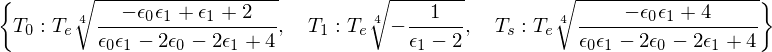

In [32]:
# The 3-layer solution reduces to two layer solution if we set e_2 = 0
out3 = {}
for var, formula in out2.iteritems():
    if var is not T_2:
        out3[var] = sympy.simplify(formula.subs(epsilon_2,0))
out3

## Generalizing to N layers

\begin{align}
E_i &= \epsilon_i \sigma T_i^4  \\
F_i &= ... + \tau_{i+2} \tau_{i+1} E_{i+3} + \tau_{i+1} E_{i+2} + E_{i+1} + E_{i-1} + \tau_{i-1} E_{i-2} + \tau_{i-1} \tau_{i-2} E_{i-3} + ... \\
F_i &= \sum_{n=2}^{N-i} \bigg( \prod_{j=1}^{n-1} \tau_{i+j} \bigg) E_{i+n} + E_{i+1} + E_{i-1} + \sum_{n=2}^{i-1} \bigg( \prod_{j=1}^{n-1} \tau_{i-j} \bigg) E_{i-n}  \\
 &= \sum_{n=1}^{N-i} \bigg( \prod_{j=0}^{n-1} \tau_{i+j} \bigg) E_{i+n} / \tau_{i}  + \sum_{n=1}^{i-1} \bigg( \prod_{j=0}^{n-1} \tau_{i-j} \bigg) E_{i-n} / \tau_i \\
 &= \frac{1}{\tau_i} \left\{ \sum_{n=1}^{N-i} \bigg( \prod_{j=0}^{n-1} \tau_{i+j} \bigg) E_{i+n} + \sum_{n=1}^{i-1} \bigg( \prod_{j=0}^{n-1} \tau_{i-j} \bigg) E_{i-n}  \right\} 
\end{align}

Now substitute $n \rightarrow -n$ in the second summation.

\begin{align}
F_i &= \frac{1}{\tau_i} \left\{ \sum_{n=1}^{N-i} \bigg( \prod_{j=0}^{n-1} \tau_{i+j} \bigg) E_{i+n} + \sum_{-n=1}^{i-1} \bigg( \prod_{j=0}^{-n-1} \tau_{i-j} \bigg) E_{i+n}  \right\}  \\
 &= \frac{1}{\tau_i} \left\{ \sum_{n=1}^{N-i} \bigg( \prod_{j=0}^{n-1} \tau_{i+j} \bigg) E_{i+n} + \sum_{n=1-i}^{-1} \bigg( \prod_{j=0}^{-n-1} \tau_{i-j} \bigg) E_{i+n}  \right\} 
\end{align}

And substitude $j \rightarrow -j$ in the second product.

\begin{align}
F_i &= \frac{1}{\tau_i} \left\{ \sum_{n=1}^{N-i} \bigg( \prod_{j=0}^{n-1} \tau_{i+j} \bigg) E_{i+n} + \sum_{n=1-i}^{-1} \bigg( \prod_{-j=0}^{-n-1} \tau_{i+j} \bigg) E_{i+n}  \right\} \\
  &= \frac{1}{\tau_i} \left\{ \sum_{n=1}^{N-i} \bigg( \prod_{j=0}^{n-1} \tau_{i+j} \bigg) E_{i+n} + \sum_{n=1-i}^{-1} \bigg( \prod_{j=0}^{1+n} \tau_{i+j} \bigg) E_{i+n}  \right\} \\
  &= \frac{1}{\tau_i} \left\{ \sum_{n=1}^{N-i} \bigg( \prod_{j=0}^{|n|-1} \tau_{i+j} \bigg) E_{i+n} + \sum_{n=1-i}^{-1} \bigg( \prod_{j=0}^{1- |n|} \tau_{i+j} \bigg) E_{i+n}  \right\} \\
  &= \frac{1}{\tau_i} \left\{ \sum_{n=1}^{N-i} \bigg( \prod_{j=0}^{|n|-1} \tau_{i+j} \bigg) E_{i+n} + \sum_{n=1-i}^{-1} \bigg( \prod_{j=0}^{sign(n) (|n|-1)} \tau_{i+j} \bigg) E_{i+n}  \right\} 
\end{align}

Now combine both sums together

\begin{align}
F_i &= \frac{1}{\tau_i} \left\{ \sum_{n=1}^{N-i} \bigg( \prod_{j=0}^{|n|-1} \tau_{i+j} \bigg) E_{i+n} + E_i + \sum_{n=1-i}^{-1} \bigg( \prod_{j=0}^{sign(n) (|n|-1)} \tau_{i+j} \bigg) E_{i+n}  \right\} - \frac{E_i}{\tau_i} \\
   &= \frac{1}{\tau_i} \left\{ \sum_{n=1-i}^{N-i} \bigg( \prod_{j=0}^{sign(n) \big(|n|-1\big)} \tau_{i+j} \bigg) E_{i+n}  - E_i \right\} 
\end{align}

with the convention that $\prod_{j=0}^{-1} = 1$.

Alternatively if we set $\prod_{j=0}^{-1} = 0$ then

$$ F_i = \frac{1}{\tau_i} \left\{ \sum_{n=1-i}^{N-i} \bigg( \prod_{j=0}^{sign(n) \big(|n|-1\big)} \tau_{i+j} \bigg) E_{i+n} \right\} $$

Let's use this notation since it simplifies our expressions.

### Net radiation
(absorptivity) * incident - emission

\begin{align}
R_i &= \epsilon_i F_i - 2 E_i  \\
  &= \frac{\epsilon_i}{\tau_i}  \left\{ \sum_{n=1-i}^{N-i} \bigg( \prod_{j=0}^{sign(n) \big(|n|-1\big)} \tau_{i+j} \bigg) E_{i+n} \right\}  - 2 E_i
\end{align}

### Alternative...

We will define the **transmissivity between layer i and layer i+n **

$$ T_{in} = \left\{ \begin{array}{cc} 
 \prod_{j=1}^{n-1} \tau_{i+j} &  n > 1 \\
 1 &  n = 1 \\
 0  &  n = 0 \\
 1 & n = -1 \\
 \prod_{j=1}^{-n-1} \tau_{i-j} &  n < -1
 \end{array} \right\}
 $$

Then the incident flux follows directly

$$ F_i = \sum_{n=1-i}^{N-i} T_{in} E_{i+n} $$

and the net radiation is

\begin{align}
R_i &= \epsilon_i F_i - 2 E_i  \\
 &= \epsilon_i \sum_{n=1-i}^{N-i} T_{in} E_{i+n} - 2 E_i 
\end{align}

Now make the substitution $i+n \rightarrow m$

\begin{align}
F_i &= \sum_{m=1}^{N} T_{im} E_{m}  \\
T_{im} &= \left\{ \begin{array}{cc} 
 \prod_{j=1}^{m-i-1} \tau_{i+j} &  m > 1+i \\
 1 &  m = i+1 \\
 0  &  m = i \\
 1 & m = i-1 \\
 \prod_{j=1}^{i-m-1} \tau_{i-j} &  m < i-1
 \end{array} \right\}
\end{align}

Or using the Einstein summation notation, since $m$ is a repeated index, we can just write

$$ F_i = T_{im} E_{m} $$

and the net radiation is

$$ R_i = \epsilon_i F_i - 2 E_i $$


# Reformulating in terms of flux between layers

Let the upwelling flux be a vector ${\bf{U}} = [U_0, U_1, ..., U_{N-1}, U_N]$.

If there are $N$ levels then $\bf{U}$ has $N+1$ elements. We will number the layers starting from 0 following `numpy` index conventions.

- $U_0$ is the upwelling flux from surface to layer 0.
- $U_1$ is the upwelling flux layer 0 to layer 1, etc.
- $U_N$ is the upwelling flux from layer N-1 (the top level) to space.

Same for the downwelling flux ${\bf{D}} = [D_0, D_1, ..., D_N]$. So $D_N$ is the flux down from space and $D_0$ is the backradiation to the surface.

The absorptivity vector is ${\bf{\epsilon}} = [\epsilon_0, \epsilon_1, ..., \epsilon_{N-1}]$ ($N$ elements)

In [33]:
epsilon, epsilon_i, N = sympy.symbols('epsilon, epsilon_i, N', nonnegative=True )

#  Will do the 3 layer version first

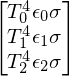

In [34]:
# vector of emissions
E = sympy.Matrix([E_0, E_1, E_2])
E

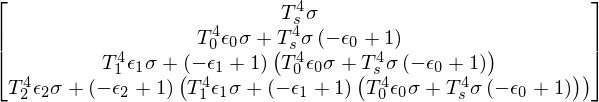

In [35]:
# upwelling flux
fromsurface = E_s
U = sympy.Matrix([fromsurface, tau_0*fromsurface + E_0, tau_1*(tau_0*fromsurface + E_0) + E_1, 
                  tau_2*(tau_1*(tau_0*fromsurface + E_0) + E_1) + E_2])
U

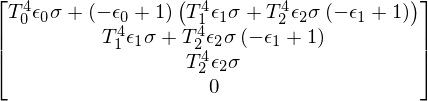

In [36]:
# downwelling flux...
fromspace = 0
D = sympy.Matrix([ tau_0*(tau_1*(tau_2*fromspace + E_2) + E_1) + E_0, 
                 tau_1*(tau_2*fromspace + E_2) + E_1, tau_2*fromspace + E_2, fromspace])
D

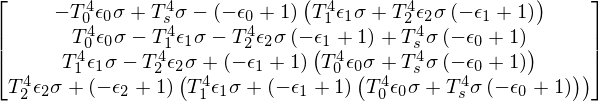

In [37]:
# Net flux, positive up
F = U - D
F

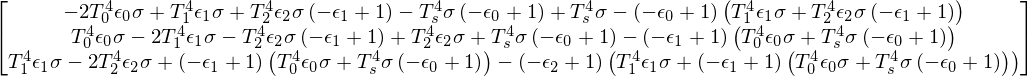

In [38]:
# The absorption is then simply the flux convergence in each layer

# define a vector of absorbed radiation -- same size as emissions
A = E.copy()

# Get the convergence
for n in range(3):
    A[n] = -(F[n+1]-F[n])

A

In [39]:
# this should reduce to zero if I did it right
sympy.simplify(A - sympy.Matrix([R_0, R_1, R_2]))

## So that works. I can formulate the tests against numerical code this way
